<a href="https://colab.research.google.com/github/williambrunos/Data-Visualization/blob/main/Class%203/Class%203.3/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series

Data that are collected and measured among the time are called time series. On this kind of analysis, time is a important factor.

To analysie and visualize these kind of data, we are going to use **line graphs**, which are very good to show tendencies among the time, with seaborn, matplotlib and pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv('https://leadfortaleza.com.br/ead2pcd/conteudo/tmp/myopenolat_1_103418176760922/aula/arquivos/dados.txt')
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,2015-02-04 18:49:59,22.290000,27.3900,0.0,621.00,0.004559
1,2015-02-04 19:50:00,21.890000,27.1000,0.0,548.50,0.004401
2,2015-02-04 20:50:00,21.600000,26.4725,0.0,509.75,0.004222
3,2015-02-04 21:49:59,21.445000,25.7450,0.0,488.00,0.004067
4,2015-02-04 22:50:00,21.290000,25.7000,0.0,467.00,0.004021
...,...,...,...,...,...,...
130,2015-02-10 04:50:00,20.100000,33.0000,0.0,444.00,0.004804
131,2015-02-10 05:50:00,20.133333,33.0600,0.0,443.50,0.004823
132,2015-02-10 06:49:59,20.200000,33.0900,0.0,449.00,0.004847
133,2015-02-10 07:50:00,20.390000,33.0450,0.0,453.00,0.004898


Supose that we want to see the variation of temperature among the days.

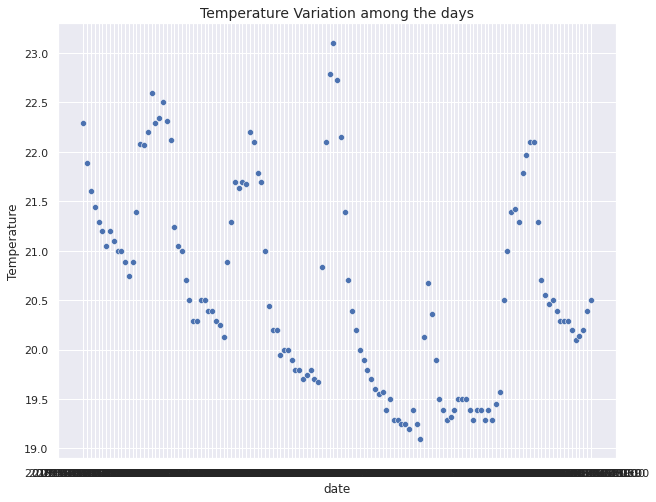

In [3]:
plt.figure(figsize=(10, 8))
plt.title('Temperature Variation among the days', fontsize=14)
sns.scatterplot(x='date', y='Temperature', data=df)
plt.show()

Notice how this is strange. The graph is made by points and the date is so overflowed on the x axis that it cannot be seen. This happens because the date on the dataframe is in a string format, which causes the visualization librarie to interpret it as a categorical variable (text), even though time is continuous.

To correct this, we have to use **to_datetime()** function.

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,2015-02-04 18:49:59,22.290,27.3900,0.0,621.00,0.004559
1,2015-02-04 19:50:00,21.890,27.1000,0.0,548.50,0.004401
2,2015-02-04 20:50:00,21.600,26.4725,0.0,509.75,0.004222
3,2015-02-04 21:49:59,21.445,25.7450,0.0,488.00,0.004067
4,2015-02-04 22:50:00,21.290,25.7000,0.0,467.00,0.004021


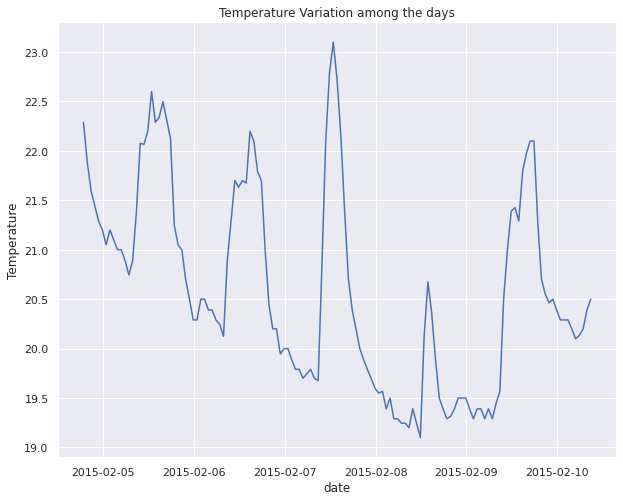

In [5]:
plt.figure(figsize=(10, 8))
plt.title('Temperature Variation among the days')
sns.lineplot(data=df, x='date', y='Temperature')
plt.show()

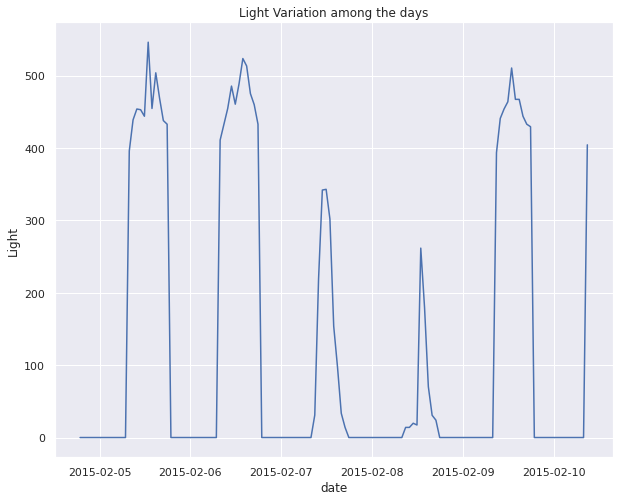

In [6]:
plt.figure(figsize=(10, 8))
plt.title('Light Variation among the days')
sns.lineplot(data=df, x='date', y='Light')
plt.show()

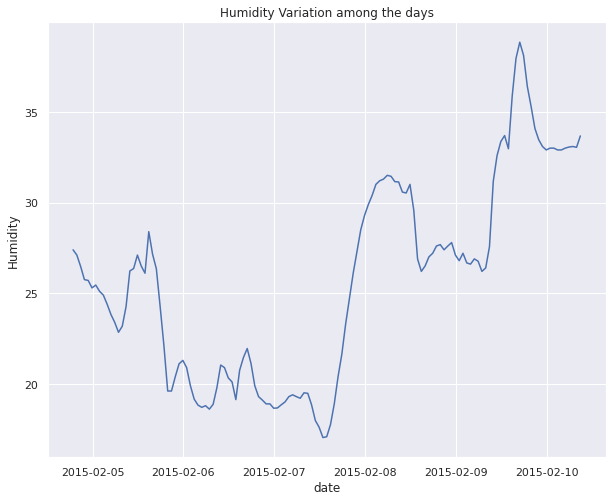

In [7]:
plt.figure(figsize=(10, 8))
plt.title('Humidity Variation among the days')
sns.lineplot(data=df, x='date', y='Humidity')
plt.show()

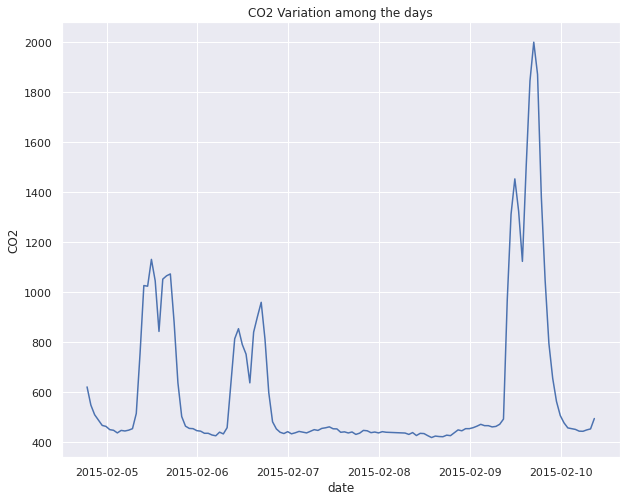

In [8]:
plt.figure(figsize=(10, 8))
plt.title('CO2 Variation among the days')
sns.lineplot(data=df, x='date', y='CO2')
plt.show()

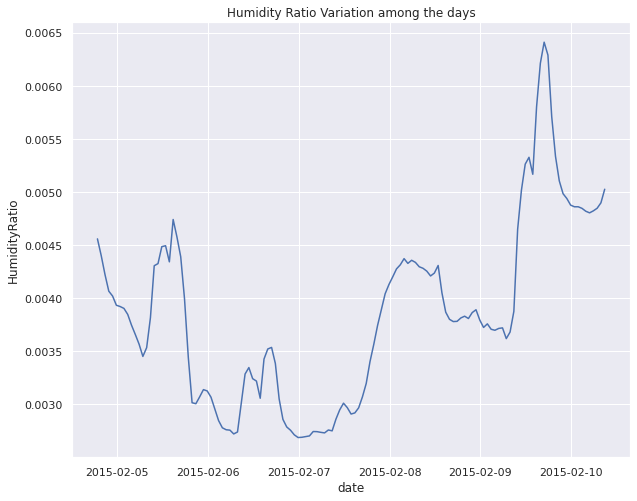

In [9]:
plt.figure(figsize=(10, 8))
plt.title('Humidity Ratio Variation among the days')
sns.lineplot(data=df, x='date', y='HumidityRatio')
plt.show()

## Multiple Values at the same time

On various time series, we have multiple values measured at the same time. When handling with these cases and using lineplot graphics, it will plot a line which represents the mean of that variable and a shadowy area representing the confidence area (with certain standard deviation).

**FOR ONE UNIQUE DATE, WE HAVE VARIOUS VALUES PLOTTED ON THE GRAPH AND SEEN AS A CONFIDENCE INTERVAL.**

In [10]:
hiv_data = pd.read_csv('https://raw.githubusercontent.com/cabrau/curso-analise-visualizacao-dados-python/master/hiv_data.txt')
hiv_data

,country,date,HIV Rate,Income Level
0,Australia,2017,0.1,HIC
1,Australia,2016,0.1,HIC
2,Australia,2015,0.1,HIC
3,Australia,2014,0.1,HIC
4,Australia,2013,0.1,HIC
...,...,...,...,...
3831,"Yemen, Rep.",1994,0.1,LIC
3832,"Yemen, Rep.",1993,0.1,LIC
3833,"Yemen, Rep.",1992,0.1,LIC
3834,"Yemen, Rep.",1991,0.1,LIC


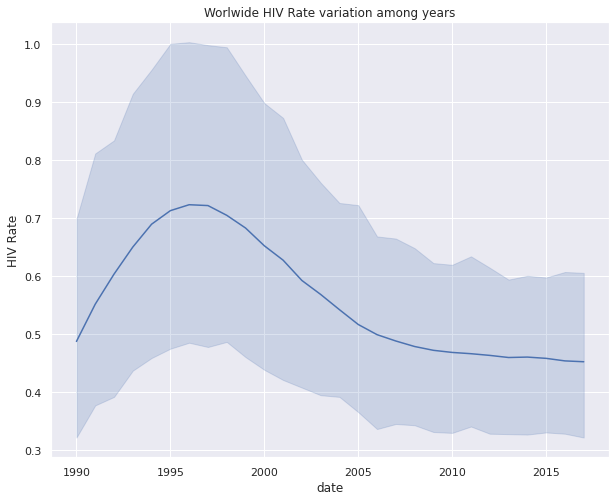

In [11]:
plt.figure(figsize=(10, 8))
plt.title('Worlwide HIV Rate variation among years')
sns.lineplot(data=hiv_data, x='date', y='HIV Rate')
plt.show()

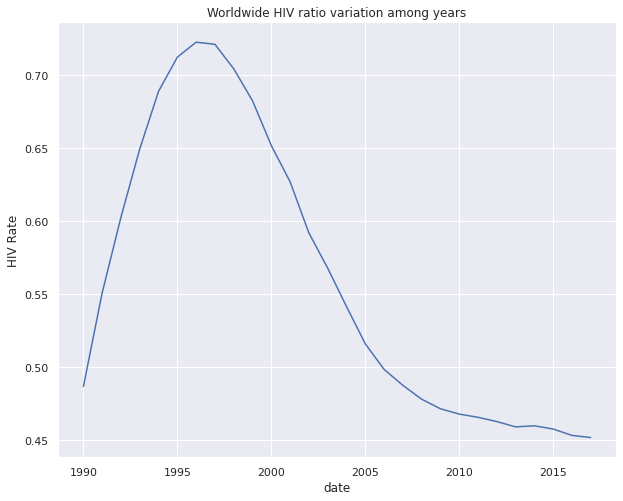

In [12]:
plt.figure(figsize=(10, 8))
plt.title('Worldwide HIV ratio variation among years')
sns.lineplot(data=hiv_data, x='date', y='HIV Rate', ci=None)
plt.show()

And what about the HIV rate among years per income level? Just add the **hue** (categories) parameter for lineplot graphic.

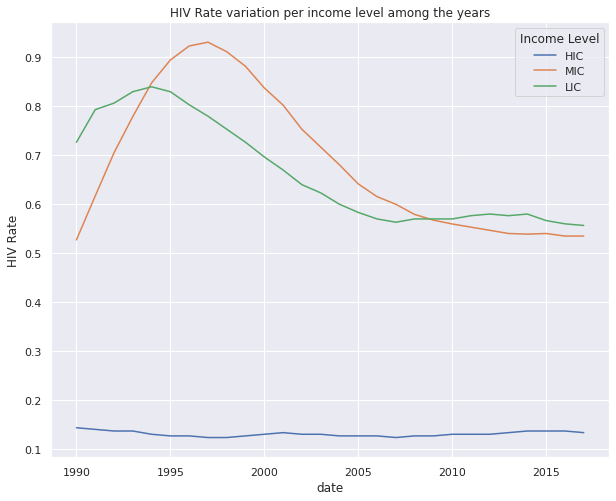

In [13]:
plt.figure(figsize=(10, 8))
plt.title('HIV Rate variation per income level among the years')
sns.lineplot(data=hiv_data, x='date', y='HIV Rate', hue='Income Level', ci=None)
plt.show()